In [34]:
#importing required libraries for data cleaning ,data preprocessing and data visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [35]:
df = pd.read_csv('Pune House data.csv')

In [36]:
df.head()


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [38]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [39]:
df['size'].fillna(df['size'].mode()[0], inplace=True)

In [40]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [41]:
df['balcony'].fillna(df['balcony'].median(), inplace=True)

In [42]:
df = df.dropna(subset=['site_location'])

In [43]:
df.isnull().sum()

area_type           0
availability        0
size                0
society          5502
total_sqft          0
bath                0
balcony             0
price               0
site_location       0
dtype: int64

In [44]:
df1 = df.drop(['society','availability','balcony'],axis = 'columns')

In [45]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [46]:
df2 = df1.drop(['size'],axis='columns')

In [47]:
df2 =df2[['total_sqft', 'bath', 'bhk', 'site_location', 'area_type', 'price']]

In [48]:
df2.head()

,total_sqft,bath,bhk,site_location,area_type,price
0,1056,2.0,2,Alandi Road,Super built-up Area,39.07
1,2600,5.0,4,Ambegaon Budruk,Plot Area,120.00
2,1440,2.0,3,Anandnagar,Built-up Area,62.00
3,1521,3.0,3,Aundh,Super built-up Area,95.00
4,1200,2.0,2,Aundh Road,Super built-up Area,51.00


In [49]:
df2['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [50]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [51]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [52]:
df2[~df2['total_sqft'].apply(is_float)].head()

,total_sqft,bath,bhk,site_location,area_type,price
30,2100 - 2850,4.0,4,Gultekdi,Super built-up Area,186.000
56,3010 - 3410,2.0,4,Model colony,Built-up Area,192.000
81,2957 - 3450,2.0,4,Shukrawar Peth,Built-up Area,224.500
122,3067 - 8156,4.0,4,Ganeshkhind,Super built-up Area,477.000
137,1042 - 1105,2.0,2,Khadaki,Super built-up Area,54.005


In [53]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [54]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)

In [55]:
df2.head()

,total_sqft,bath,bhk,site_location,area_type,price
0,1056.0,2.0,2,Alandi Road,Super built-up Area,39.07
1,2600.0,5.0,4,Ambegaon Budruk,Plot Area,120.00
2,1440.0,2.0,3,Anandnagar,Built-up Area,62.00
3,1521.0,3.0,3,Aundh,Super built-up Area,95.00
4,1200.0,2.0,2,Aundh Road,Super built-up Area,51.00


In [56]:
df2['price_per_sqft'] = df2['price']*100000/ df2['total_sqft']

In [57]:
df2.head()

,total_sqft,bath,bhk,site_location,area_type,price,price_per_sqft
0,1056.0,2.0,2,Alandi Road,Super built-up Area,39.07,3699.810606
1,2600.0,5.0,4,Ambegaon Budruk,Plot Area,120.00,4615.384615
2,1440.0,2.0,3,Anandnagar,Built-up Area,62.00,4305.555556
3,1521.0,3.0,3,Aundh,Super built-up Area,95.00,6245.890861
4,1200.0,2.0,2,Aundh Road,Super built-up Area,51.00,4250.000000


In [58]:
len(df2['site_location'].unique())

97

In [59]:
df2[df2.total_sqft/df2.bhk<300]

,total_sqft,bath,bhk,site_location,area_type,price,price_per_sqft
9,1020.0,6.0,6,Bhavani Peth,Plot Area,370.0,36274.509804
45,600.0,9.0,8,Kondhwa Budruk,Plot Area,200.0,33333.333333
58,1407.0,4.0,6,Mundhawa,Plot Area,150.0,10660.980810
68,1350.0,7.0,8,Pirangut,Plot Area,85.0,6296.296296
70,500.0,3.0,3,Pune Railway Station,Plot Area,100.0,20000.000000
...,...,...,...,...,...,...,...
13277,1400.0,7.0,7,Ghorpadi,Plot Area,218.0,15571.428571
13279,1200.0,5.0,6,Gultekdi,Plot Area,130.0,10833.333333
13281,1375.0,5.0,5,Hadapsar,Plot Area,125.0,9090.909091
13303,774.0,5.0,5,Manik Bagh,Plot Area,70.0,9043.927649


In [60]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]

In [61]:
df3.shape

(12575, 7)

In [62]:
upper_limit = df3['price_per_sqft'].quantile(0.99)
lower_limit = df3['price_per_sqft'].quantile(0.01)

# Filter out the outliers
df3 = df3[(df3['price_per_sqft'] < upper_limit) & (df3['price_per_sqft'] > lower_limit)]
df3.shape

(12277, 7)

In [63]:
df3['price_per_sqft'].describe()

count    12277.000000
mean      6100.230946
std       2968.029932
min       2500.366300
25%       4237.288136
50%       5294.117647
75%       6863.905325
max      21649.200221
Name: price_per_sqft, dtype: float64

In [64]:
df3.head()

,total_sqft,bath,bhk,site_location,area_type,price,price_per_sqft
0,1056.0,2.0,2,Alandi Road,Super built-up Area,39.07,3699.810606
1,2600.0,5.0,4,Ambegaon Budruk,Plot Area,120.00,4615.384615
2,1440.0,2.0,3,Anandnagar,Built-up Area,62.00,4305.555556
3,1521.0,3.0,3,Aundh,Super built-up Area,95.00,6245.890861
4,1200.0,2.0,2,Aundh Road,Super built-up Area,51.00,4250.000000


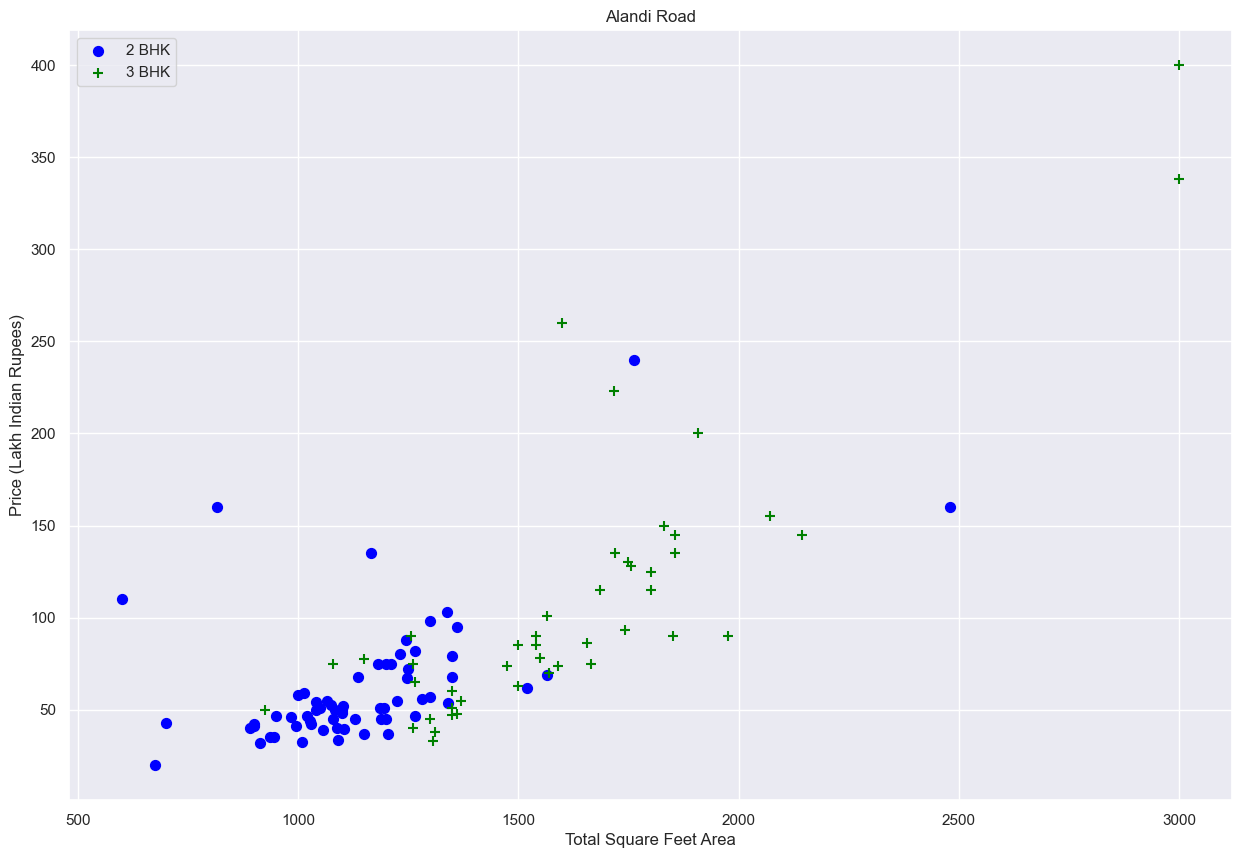

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Alandi Road")

In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [69]:
df4 = remove_pps_outliers(df3)

In [70]:
df3.shape

(12277, 7)

In [71]:
df4.shape


(10222, 7)

In [72]:
df4.rename(columns={'site_location': 'location'}, inplace=True)


In [73]:
df4.head()

,total_sqft,bath,bhk,location,area_type,price,price_per_sqft
0,1056.0,2.0,2,Alandi Road,Super built-up Area,39.07,3699.810606
1,2894.0,4.0,4,Alandi Road,Plot Area,245.00,8465.791292
2,1084.0,2.0,2,Alandi Road,Super built-up Area,50.00,4612.546125
3,1230.0,2.0,2,Alandi Road,Super built-up Area,80.00,6504.065041
4,1750.0,3.0,3,Alandi Road,Super built-up Area,130.00,7428.571429


In [74]:
df4.drop(columns=['area_type'])

,total_sqft,bath,bhk,location,price,price_per_sqft
0,1056.0,2.0,2,Alandi Road,39.07,3699.810606
1,2894.0,4.0,4,Alandi Road,245.00,8465.791292
2,1084.0,2.0,2,Alandi Road,50.00,4612.546125
3,1230.0,2.0,2,Alandi Road,80.00,6504.065041
4,1750.0,3.0,3,Alandi Road,130.00,7428.571429
...,...,...,...,...,...,...
10217,1050.0,2.0,2,Yerawada,54.00,5142.857143
10218,970.0,2.0,2,Yerawada,45.00,4639.175258
10219,1140.0,2.0,2,Yerawada,57.00,5000.000000
10220,1464.0,3.0,3,Yerawada,56.00,3825.136612


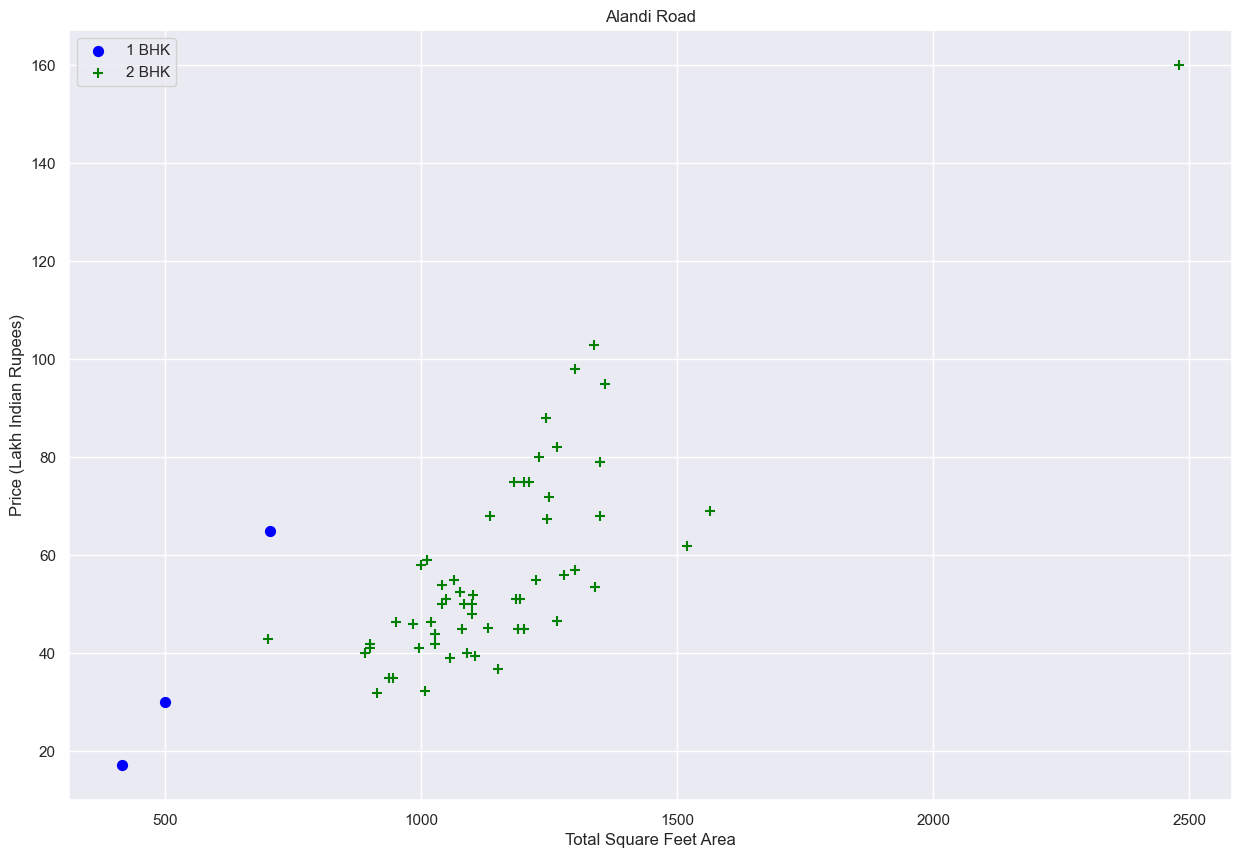

In [75]:
def plot_scatter_chart(df,location):
    bhk1 = df[(df.location==location) & (df.bhk==1)]
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.total_sqft,bhk1.price,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='+', color='green',label='2 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Alandi Road")

In [76]:
def remove_bhk_outliers(data):
    # Add a price per square foot column if not already present
    if 'price_per_sqft' not in data.columns:
        data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']
    
    # Function to identify outliers
    def identify_outliers(group):
        bhk_1 = group[group['bhk'] == 1]['price_per_sqft']
        bhk_2 = group[group['bhk'] == 2]['price_per_sqft']
        
        if not bhk_1.empty and not bhk_2.empty:
            if bhk_1.mean() > bhk_2.mean():
                return group[group['bhk'] == 1].index
        return []

    # Apply the function to each location group
    outliers = data.groupby('location').apply(identify_outliers).explode().dropna().astype(int)

    # Drop the outliers
    data = data.drop(outliers)

    return data

In [77]:
df4 = remove_bhk_outliers(df4)

In [78]:
df4.shape

(9867, 7)

Text(0, 0.5, 'Count')

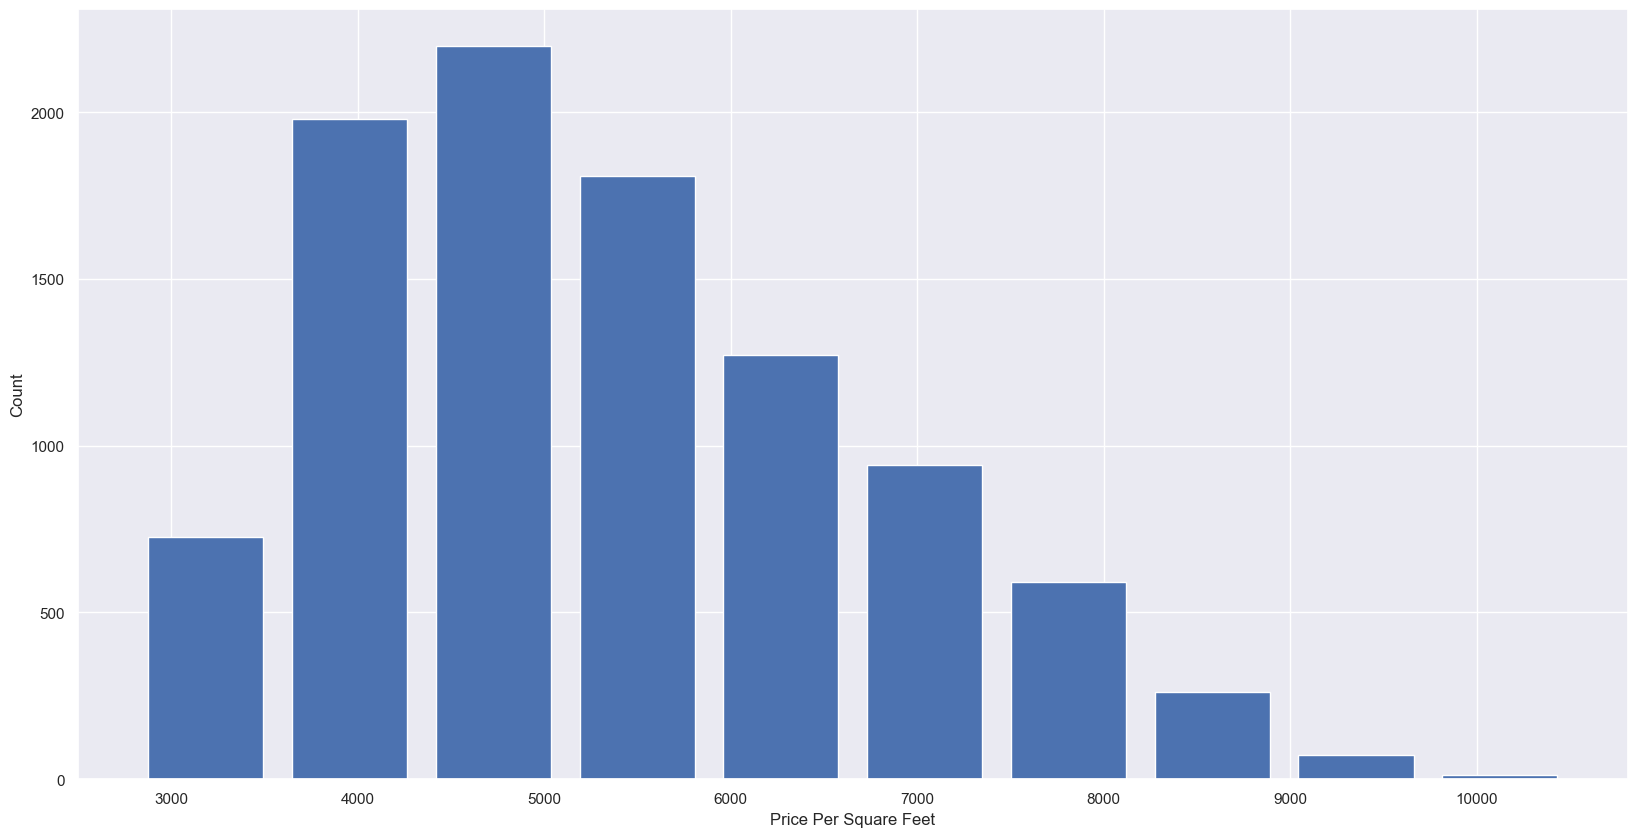

In [79]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [80]:
df4.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  6.,  1.,  7.,  8., 12., 13., 16.])

In [81]:
df4[df4.bath>10]

,total_sqft,bath,bhk,location,area_type,price,price_per_sqft
2490,12000.0,12.0,10,Fatima Nagar,Super built-up Area,525.0,4375.000000
4963,5425.0,13.0,13,Kondhwa Khurd,Super built-up Area,275.0,5069.124424
5983,10000.0,16.0,16,Model colony,Super built-up Area,550.0,5500.000000
9746,4000.0,12.0,10,Wagholi,Super built-up Area,160.0,4000.000000


In [82]:
df4[df4.bath> df4.bhk+2]

,total_sqft,bath,bhk,location,area_type,price,price_per_sqft
735,1806.0,6.0,3,Baner,Super built-up Area,116.0,6423.034330
2902,11338.0,9.0,6,Ghorpade Peth,Super built-up Area,1000.0,8819.897689
4024,7000.0,8.0,4,Karve Nagar,Built-up Area,450.0,6428.571429


In [83]:
df4 = df4[df4.bath < df4.bhk+2]
df4.shape


(9793, 7)

In [84]:
df5 = df4.drop(columns=['area_type','price_per_sqft'])


In [85]:
df5.head()

,total_sqft,bath,bhk,location,price
0,1056.0,2.0,2,Alandi Road,39.07
1,2894.0,4.0,4,Alandi Road,245.00
2,1084.0,2.0,2,Alandi Road,50.00
3,1230.0,2.0,2,Alandi Road,80.00
4,1750.0,3.0,3,Alandi Road,130.00


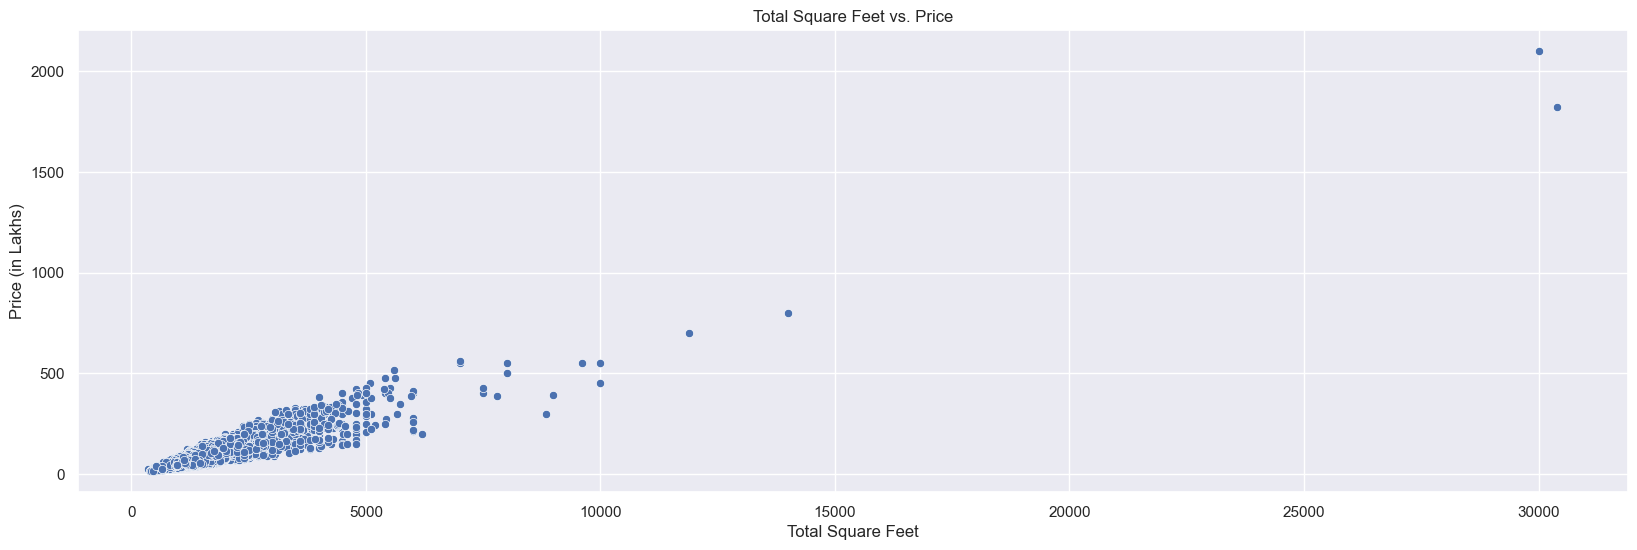

In [86]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='total_sqft', y='price', data=df5)
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.show()

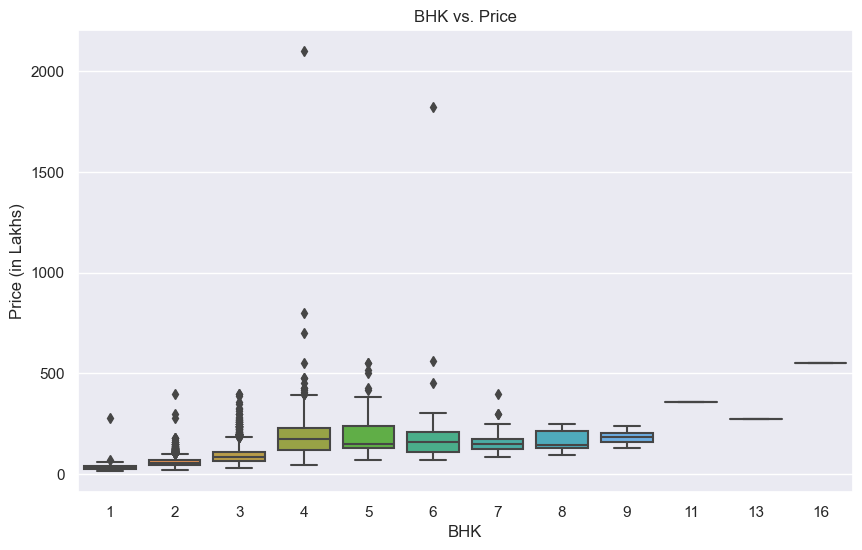

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bhk', y='price', data=df5)
plt.title('BHK vs. Price')
plt.xlabel('BHK')
plt.ylabel('Price (in Lakhs)')
plt.show()

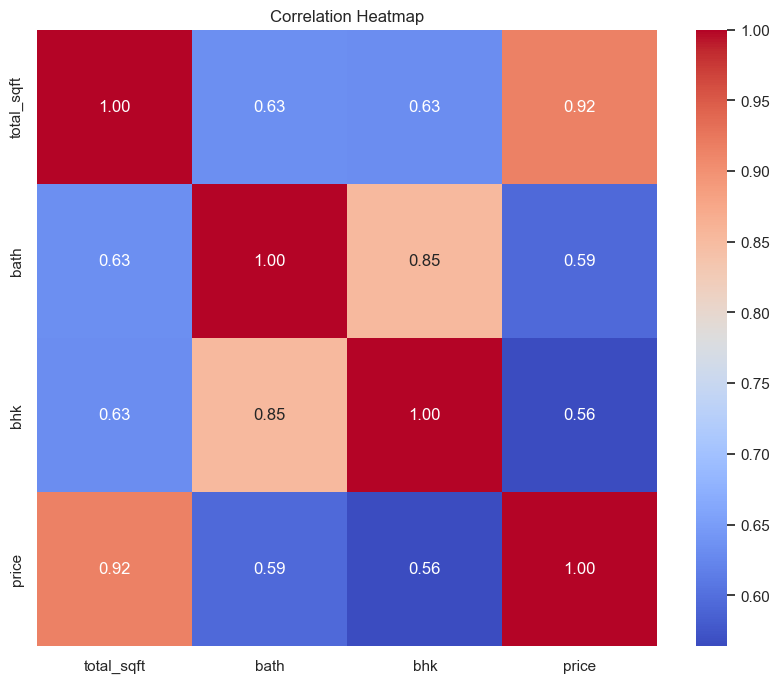

In [88]:
plt.figure(figsize=(10, 8))
correlation_matrix = df5.drop(columns='location',axis='column').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [89]:
dummies = pd.get_dummies(df5.location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
df6 = pd.concat([df5,dummies],axis='columns')

In [91]:
df6.head()

,total_sqft,bath,bhk,location,price,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,Alandi Road,39.07,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,Alandi Road,245.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,Alandi Road,50.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,2,Alandi Road,80.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,3,Alandi Road,130.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df7 = df6.drop(columns='location')

In [93]:
df7.columns = df7.columns.str.lower()

In [94]:
df7

,total_sqft,bath,bhk,price,alandi road,ambegaon budruk,anandnagar,aundh,aundh road,balaji nagar,...,uruli devachi,vadgaon budruk,viman nagar,vishrant wadi,wadgaon sheri,wagholi,wakadewadi,wanowrie,warje,yerawada
0,1056.0,2.0,2,39.07,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,245.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,50.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,2,80.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,3,130.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,1050.0,2.0,2,54.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10218,970.0,2.0,2,45.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10219,1140.0,2.0,2,57.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10220,1464.0,3.0,3,56.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [95]:
X = df7.drop(columns='price',axis='column')

In [96]:
y = df7.price

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7754225831018275

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80307323, 0.79105615, 0.91852071, 0.81133404, 0.81495252])

In [100]:
def predict_price(location, sqft, bath, bhk):    
    # Find the index of the location in the columns
    loc_index = np.where(X.columns == location)[0][0]

    # Create an array of zeros with the same length as the number of columns
    x = np.zeros(len(X.columns))

    # Assign the values for sqft, bath, and bhk
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Set the value of the location column to 1 if it exists
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert the array to a DataFrame with the same columns as the training data
    x_df = pd.DataFrame([x], columns=X.columns)

    # Predict the price using the DataFrame
    return lr_clf.predict(x_df)[0]

In [101]:
predict_price('anandnagar',1000, 2, 2)

58.353168964385986

In [102]:
predict_price('wagholi',1000, 2, 3)

42.52065992355347

In [103]:
predict_price('warje',2000, 3, 3)

113.33097696304321

In [104]:
import pickle
with open('Pune_house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [105]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))